<a href="https://colab.research.google.com/github/zarapoghosyan01/indivi-project-bass/blob/main/Homework%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
pip install python-louvain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
import networkx as nx
import community as louvain
import matplotlib.pyplot as plt

In [15]:
# Creating an empty directed graph
G = nx.DiGraph()

# Reading the file and add nodes and edges to the graph
with open('connections.txt') as f:
    for line in f:
        # We remove newline character and split the line into source and target nodes
        source, target = line.strip().split()
        
        # Adding the nodes and edge to the graph
        G.add_edge(source, target)

# We print the number of nodes and edges in the graph
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")


Number of nodes: 4039
Number of edges: 88234


In [16]:
# Finding the bridges using Tarjan's algorithm
bridges = []
visited = set()
visited_order = []
low = {node: float('inf') for node in G.nodes()}

def dfs(node, parent):
    visited.add(node)
    visited_order.append(node)
    low[node] = visited_id = len(visited_order)
    
    for neighbor in G.neighbors(node):
        if neighbor == parent:
            continue
        if neighbor not in visited:
            dfs(neighbor, node)
            low[node] = min(low[node], low[neighbor])
            if visited_id < low[neighbor]:
                bridges.append((node, neighbor))
        else:
            low[node] = min(low[node], visited_order.index(neighbor)+1)

dfs(list(G.nodes())[0], None)

# We print the bridges
print("Bridges:")
for bridge in bridges:
    print(bridge)
    

Bridges:
('323', '332')
('323', '341')
('322', '323')
('322', '329')
('339', '340')
('339', '347')
('322', '339')
('322', '342')
('322', '345')
('290', '322')
('280', '290')
('280', '291')
('280', '297')
('308', '338')
('280', '304')
('277', '280')
('277', '285')
('277', '294')
('311', '344')
('277', '311')
('168', '277')
('158', '168')
('320', '346')
('271', '298')
('239', '295')
('158', '232')
('158', '242')
('158', '248')
('158', '317')
('142', '158')
('222', '240')
('203', '270')
('142', '161')
('142', '169')
('142', '170')
('123', '142')
('122', '123')
('557', '570')
('555', '557')
('553', '555')
('561', '565')
('679', '682')
('678', '679')
('678', '685')
('639', '678')
('637', '639')
('651', '683')
('1888', '1891')
('1902', '1911')
('1898', '1902')
('1888', '1898')
('1879', '1888')
('1864', '1879')
('1845', '1864')
('1843', '1845')
('1842', '1843')
('1842', '1849')
('1842', '1861')
('1868', '1900')
('1842', '1868')
('1839', '1842')
('1839', '1886')
('1839', '1909')
('1826', '1839

In [17]:
# Calculating the density of the graph
density = nx.density(G)

# We print the density
print(f"Density: {density}")

Density: 0.0054099817517196435


This value is very low, which means that the graph is not very connected. Specifically, the graph has only 0.54% of the possible edges, which is a relatively small number. This suggests that the nodes in the graph may be relatively independent or disconnected from each other.This means that it may be more difficult to identify the most important individuals in the network. In such a scenario, alternative methods such as network centrality measures (e.g., degree centrality, betweenness centrality, or PageRank) may be useful to identify the key individuals to target with the limited marketing budget. These measures can identify the most influential or important nodes in the network, even when the density of the graph is low.

In [18]:
# Calculating the degree of each node
degree_dict = dict(G.degree(G.nodes()))

# Sorting the nodes by degree
sorted_degree = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)

# We print the node with the highest degree
print(f"Node with the highest degree: {sorted_degree[0][0]} ({sorted_degree[0][1]} connections)")

# We print the node with the lowest degree
print(f"Node with the lowest degree: {sorted_degree[-1][0]} ({sorted_degree[-1][1]} connections)")

Node with the highest degree: 107 (1045 connections)
Node with the lowest degree: 4035 (1 connections)


In [19]:
# Calculating the in-degree of each node
in_degree_dict = dict(G.in_degree(G.nodes()))

# Calculating the out-degree of each node
out_degree_dict = dict(G.out_degree(G.nodes()))

# Sorting the nodes by in-degree
sorted_in_degree = sorted(in_degree_dict.items(), key=lambda x: x[1], reverse=True)

# Sorting the nodes by out-degree
sorted_out_degree = sorted(out_degree_dict.items(), key=lambda x: x[1], reverse=True)

# We print the node with the highest in-degree
print(f"Node with the highest in-degree: {sorted_in_degree[0][0]} ({sorted_in_degree[0][1]} incoming connections)")

# We print the node with the highest out-degree
print(f"Node with the highest out-degree: {sorted_out_degree[0][0]} ({sorted_out_degree[0][1]} outgoing connections)")

Node with the highest in-degree: 1888 (251 incoming connections)
Node with the highest out-degree: 107 (1043 outgoing connections)


In [20]:
# Calculating the closeness centrality of each node
closeness_dict = nx.closeness_centrality(G)

# Sorting the nodes by closeness centrality
sorted_closeness = sorted(closeness_dict.items(), key=lambda x: x[1], reverse=True)

# We print the node with the highest closeness centrality
print(f"Node with the highest closeness centrality: {sorted_closeness[0][0]} ({sorted_closeness[0][1]:.4f})")

Node with the highest closeness centrality: 2642 (0.1180)


This node is important for efficient communication and information dissemination as it can quickly communicate with other nodes in the network.

In [21]:
# Calculating the betweenness centrality of each node
betweenness_dict = nx.betweenness_centrality(G)

# Sorting the nodes by betweenness centrality
sorted_betweenness = sorted(betweenness_dict.items(), key=lambda x: x[1], reverse=True)

# We print the node with the highest betweenness centrality
print(f"Node with the highest betweenness centrality: {sorted_betweenness[0][0]} ({sorted_betweenness[0][1]} betweenness centrality)")

Node with the highest betweenness centrality: 1684 (0.03299985344063623 betweenness centrality)


This node acts as a bridge between different parts of the network, and its removal could disrupt communication between different nodes.

In [22]:
# Calculating the eigenvector centrality of each node
eigenvector_dict = nx.eigenvector_centrality_numpy(G)

# Sorting the nodes by eigenvector centrality
sorted_eigenvector = sorted(eigenvector_dict.items(), key=lambda x: x[1], reverse=True)

# We print the node with the highest eigenvector centrality
print(f"Node with the highest eigenvector centrality: {sorted_eigenvector[0][0]} ({sorted_eigenvector[0][1]})")

Node with the highest eigenvector centrality: 2655 (0.5101336294240177)


This node is important for spreading information throughout the network because it is connected to other important nodes that have a high influence in the network.

In [23]:
pip install python-igraph


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 90.9 MB/s eta 0:00:00
  Created wheel for python-igraph: filename=python_igraph-0.10.4-py3-none-any.whl size=9073 sha256=026f4162a44c1c3c91fbe965c0563475272cee3120fdeeb63ac69d24c06b041b
  Stored in directory: /root/.cache/pip/wheels/49/27/15/dcf90953e3e3322e6f3e447514b20cf39b53c6518cb4a7bace
Successfully built python-igraph


In [24]:
# Converting the directed graph to an undirected graph
undirected_G = G.to_undirected()

# Performing community detection using the Label Propagation algorithm
communities = nx.algorithms.community.label_propagation_communities(undirected_G)

# We get the number of communities
num_communities = len(list(communities))

# We print the number of communities
print(f"Number of communities: {num_communities}")

Number of communities: 44


In [25]:
# Converting the communities to a list for further analysis
community_list = list(communities)

# Finding the largest and smallest communities
largest_community = max(community_list, key=len)
smallest_community = min(community_list, key=len)

# We print the size of the largest and smallest communities
print(f"Size of the largest community: {len(largest_community)}")
print(f"Size of the smallest community: {len(smallest_community)}")

Size of the largest community: 1030
Size of the smallest community: 2


The difference in community sizes, ranging from a large community to a small community, suggests varying levels of cohesion and connectivity within the network. Analyzing the characteristics and relationships within these communities can provide insights into the structure and dynamics of the network, potentially uncovering different groups or subgroups with specific roles or interactions.








In [26]:
# Sorting the communities based on size in descending order
sorted_communities = sorted(community_list, key=len, reverse=True)


In [27]:
# Selecting the three largest communities
largest_communities = sorted_communities[:3]

In [28]:
# Creating a subgraph for the three largest communities
subgraph = G.subgraph([node for community in largest_communities for node in community])

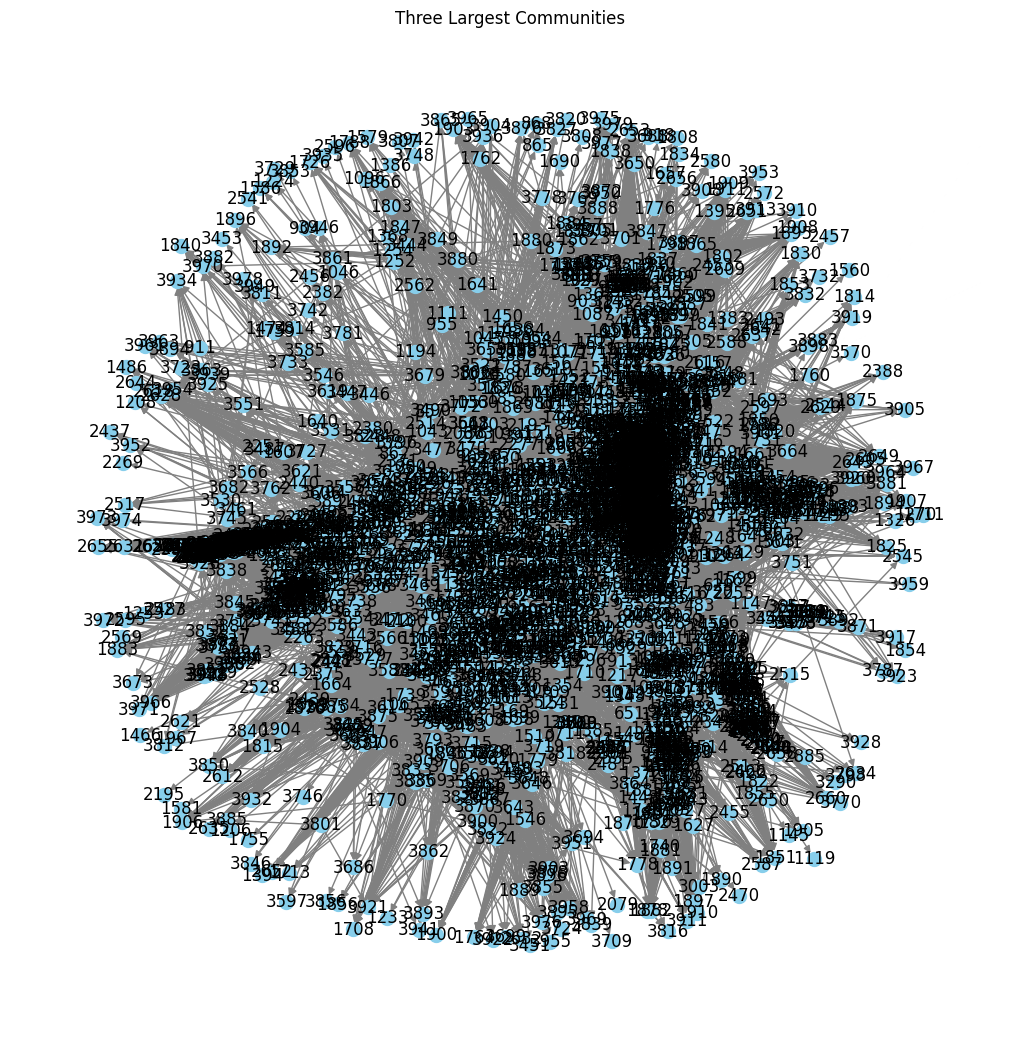

In [29]:
# Drawing the subgraph
pos = nx.spring_layout(subgraph)
plt.figure(figsize=(10, 10))
nx.draw(subgraph, pos, with_labels=True, node_color='skyblue', node_size=100, edge_color='gray')
plt.title('Three Largest Communities')
plt.show()

In [30]:
# Calculating degree centrality for all nodes
degree_centrality = nx.degree_centrality(G)
# Get the top 3 nodes with the highest degree centrality
top_degree_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:3]
# Removing the top 3 nodes with the highest degree centrality
G_removed_degree = G.copy()
G_removed_degree.remove_nodes_from(top_degree_nodes)


In [31]:
# Calculating closeness centrality for all nodes
closeness_centrality = nx.closeness_centrality(G)
# Get the top 3 nodes with the highest closeness centrality
top_closeness_nodes = sorted(closeness_centrality, key=closeness_centrality.get, reverse=True)[:3]
# Removing the top 3 nodes with the highest closeness centrality
G_removed_closeness = G.copy()
G_removed_closeness.remove_nodes_from(top_closeness_nodes)

In [32]:
# Calculating betweenness centrality for all nodes
betweenness_centrality = nx.betweenness_centrality(G)
# Get the top 3 nodes with the highest betweenness centrality
top_betweenness_nodes = sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)[:3]
# Removing the top 3 nodes with the highest betweenness centrality
G_removed_betweenness = G.copy()
G_removed_betweenness.remove_nodes_from(top_betweenness_nodes)


In [37]:
# Calculating PageRank centrality for all nodes
pagerank_centrality = nx.pagerank(G)
# Get the top 3 nodes with the highest PageRank centrality
top_pagerank_nodes = sorted(pagerank_centrality, key=pagerank_centrality.get, reverse=True)[:3]
# Remove the top 3 nodes with the highest PageRank centrality
G_removed_pagerank = G.copy()
G_removed_pagerank.remove_nodes_from(top_pagerank_nodes)

In [38]:
# Plotting the graphs
plt.figure(figsize=(18, 12))


<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

Text(0.5, 1.0, 'Graph with Top 3 Degree Centrality Nodes Removed')

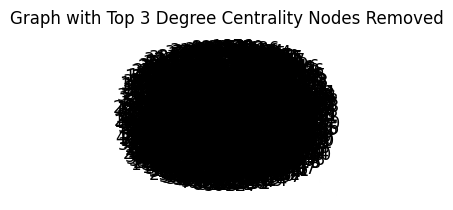

In [44]:
# Degree Centrality
plt.subplot(221)
pos = nx.spring_layout(G_removed_degree)
nx.draw(G_removed_degree, pos, with_labels=True, node_color='skyblue', node_size=0.01, edge_color='gray')
plt.title('Graph with Top 3 Degree Centrality Nodes Removed')

Text(0.5, 1.0, 'Graph with Top 3 Closeness Centrality Nodes Removed')

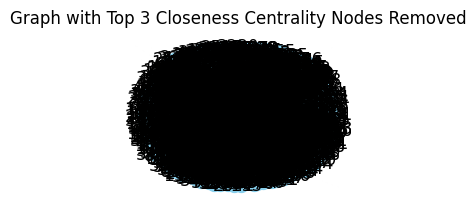

In [45]:
# Closeness Centrality
plt.subplot(222)
pos = nx.spring_layout(G_removed_closeness)
nx.draw(G_removed_closeness, pos, with_labels=True, node_color='skyblue', node_size=100, edge_color='gray')
plt.title('Graph with Top 3 Closeness Centrality Nodes Removed')


Text(0.5, 1.0, 'Graph with Top 3 Betweenness Centrality Nodes Removed')

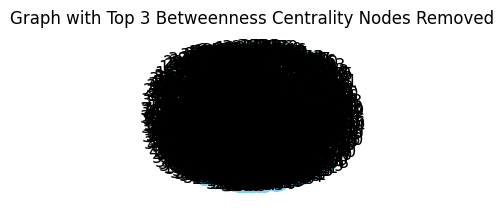

In [47]:
# Betweenness Centrality
plt.subplot(223)
pos = nx.spring_layout(G_removed_betweenness)
nx.draw(G_removed_betweenness, pos, with_labels=True, node_color='skyblue', node_size=100, edge_color='gray')
plt.title('Graph with Top 3 Betweenness Centrality Nodes Removed')

In [52]:
# Eigenvector Centrality
if 'G_removed_eigenvector' in locals():
    plt.subplot(224)
    pos = nx.spring_layout(G_removed_eigenvector)
    nx.draw(G_removed_eigenvector, pos, with_labels=True, node_color='skyblue', node_size=100, edge_color='gray')
    plt.title('Graph with Top 3 Eigenvector Centrality Nodes Removed')


In [50]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [54]:
# Replacing with the actual top three communities
largest_community = []
second_largest_community = []
third_largest_community = []

In [56]:
# Finding the influencers within each community
influencers = {}
for community in [largest_community, second_largest_community, third_largest_community]:
    if community:
        # Calculating the in-degree centrality for nodes in the community
        in_degree_centrality = nx.in_degree_centrality(G.subgraph(community))
        # Getting the node with the highest in-degree centrality
        influencer = max(in_degree_centrality, key=in_degree_centrality.get)
        influencers[community] = influencer



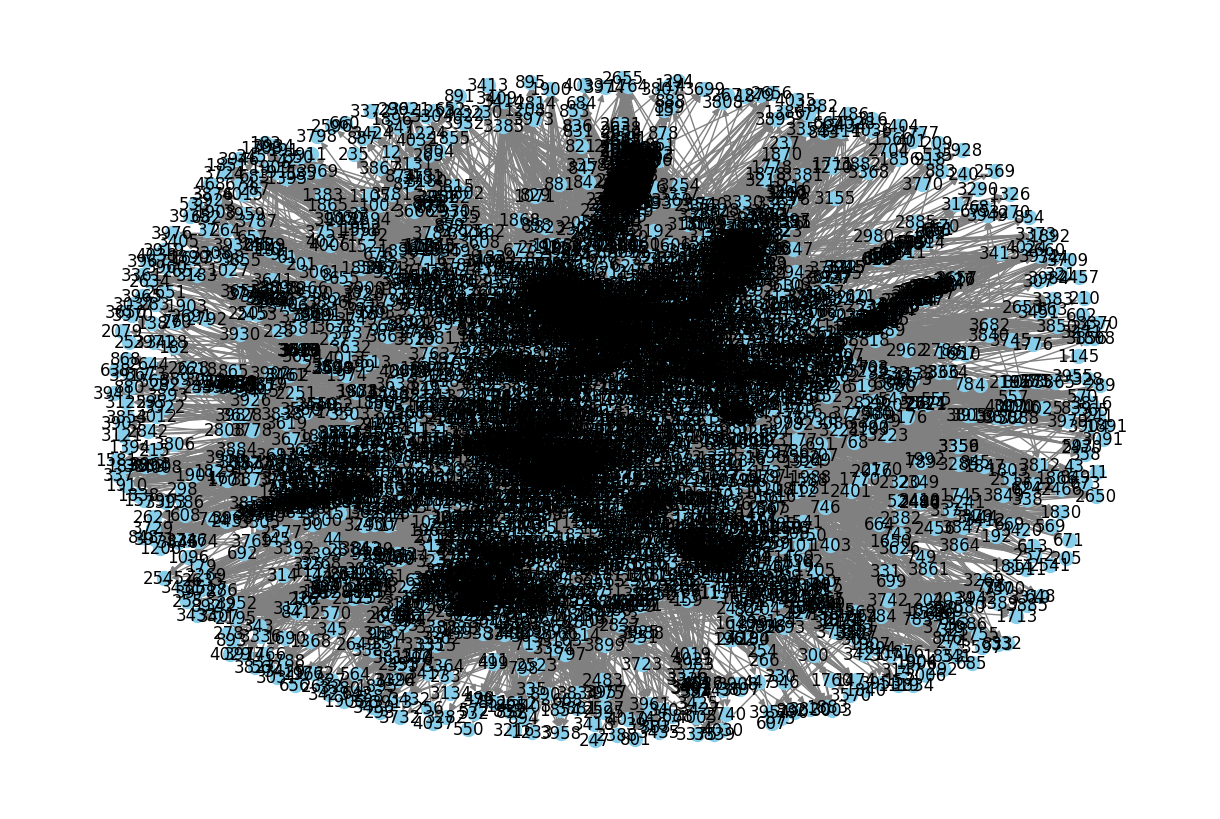

In [57]:
# Plotting the graph with the influencers highlighted
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=100, edge_color='gray')
